### Load Modules

In [1]:
import tensorflow as tf
import tensorflow.keras.datasets as tfds
import random
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import keras

Using TensorFlow backend.


### Prepare data

In [2]:
(X_train,y_train),(X_test,y_test) = tfds.mnist.load_data()

In [3]:
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

In [4]:
print(f'shape of training data: {X_train.shape}')
print(f'shape of test data: {X_test.shape}')

shape of training data: (60000, 28, 28)
shape of test data: (10000, 28, 28)


In [5]:
def random_examples():
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        features = random.choices(X_train,k=25)
        plt.imshow(features[i], cmap=plt.cm.binary)
    plt.show()

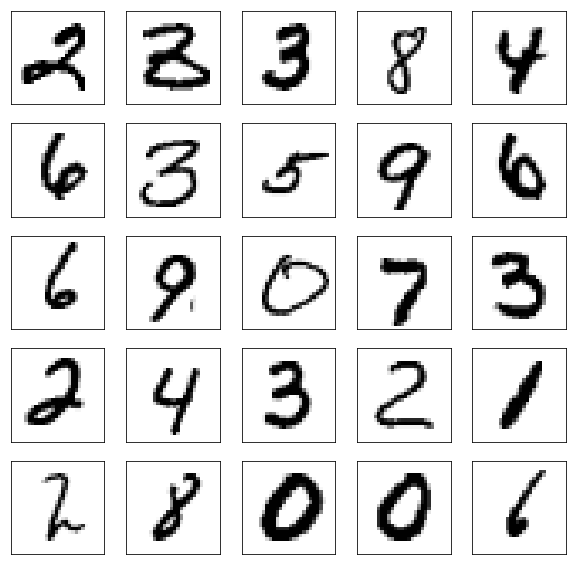

In [6]:
random_examples()

In [7]:
num_classes = 10
input_shape = (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print("x_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Build the model

In [8]:
model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

### Train Model

In [10]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 26s 61ms/step - loss: 0.3656 - accuracy: 0.8919 - val_loss: 0.0831 - val_accuracy: 0.9768
Epoch 2/15
422/422 [==============================] - 24s 56ms/step - loss: 0.1078 - accuracy: 0.9668 - val_loss: 0.0562 - val_accuracy: 0.9847
Epoch 3/15
422/422 [==============================] - 24s 57ms/step - loss: 0.0810 - accuracy: 0.9755 - val_loss: 0.0485 - val_accuracy: 0.9877
Epoch 4/15
422/422 [==============================] - 25s 59ms/step - loss: 0.0672 - accuracy: 0.9785 - val_loss: 0.0392 - val_accuracy: 0.9895
Epoch 5/15
422/422 [==============================] - 25s 59ms/step - loss: 0.0598 - accuracy: 0.9811 - val_loss: 0.0406 - val_accuracy: 0.9903
Epoch 6/15
422/422 [==============================] - 25s 58ms/step - loss: 0.0541 - accuracy: 0.9838 - val_loss: 0.0361 - val_accuracy: 0.9892
Epoch 7/15
422/422 [==============================] - 24s 57ms/step - loss: 0.0490 - accuracy: 0.9847 - val_loss: 0.0330 - val_accuracy:

### Evaluate Model

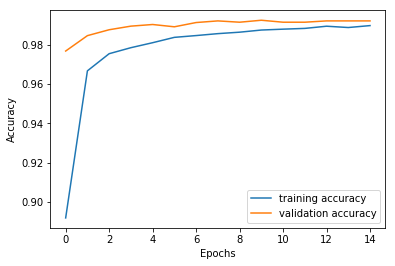

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure()
plt.plot(range(epochs),acc,label = 'training accuracy')
plt.plot(range(epochs),val_acc,label = 'validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

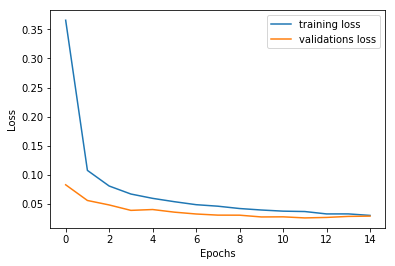

In [17]:
plt.figure()
plt.plot(range(epochs),loss,label = 'training loss')
plt.plot(range(epochs),val_loss,label='validations loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02335381880402565
Test accuracy: 0.9923999905586243
